In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [58]:
data = pd.read_csv('../Datasets/invasion.csv')

In [59]:
data['class'].replace({'transport':1, 'fighter':2, 'cruiser':3}, inplace=True)

In [60]:
X = data.drop(['class'], axis=1)

In [61]:
y = data['class']

In [5]:
rf = RandomForestClassifier(random_state=0)

In [63]:
parameters = {'n_estimators': range(10,50,10), 
              'max_depth': range(1,12,2), 
              'min_samples_leaf': range(1,7), 
              'min_samples_split': range(2,9,2)}

In [64]:
best_rf = GridSearchCV(rf, parameters, cv=3, n_jobs=-1)

In [65]:
best_rf.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=9,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth'

In [66]:
best_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [67]:
rf = RandomForestClassifier(max_depth=3, 
                            min_samples_leaf=1, 
                            min_samples_split=2, 
                            n_estimators=10, 
                            random_state=0)

In [68]:
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

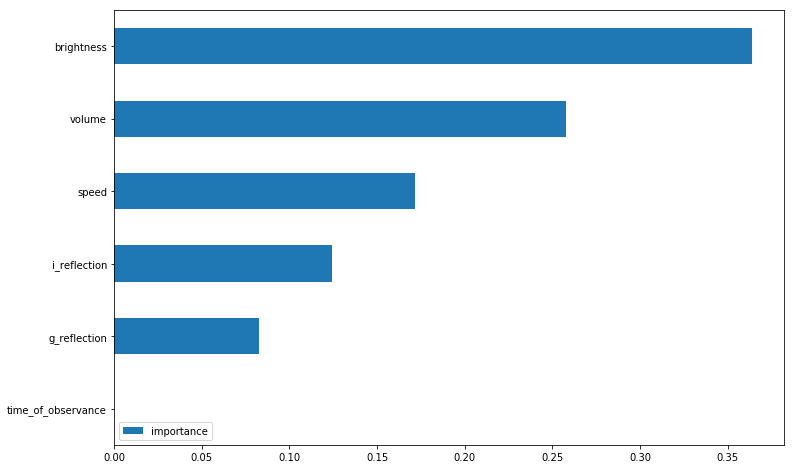

In [69]:
imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [78]:
X_operative_information = pd.read_csv('../Datasets/invation_operative_information.csv')

In [80]:
y_operative_information = rf.predict(X_operative_information)

In [83]:
y_operative_information

array([2, 1, 1, ..., 1, 2, 1], dtype=int64)

In [92]:
np.count_nonzero(y_operative_information==1)

595

In [90]:
np.count_nonzero(y_operative_information==2)

675

In [91]:
np.count_nonzero(y_operative_information==3)

230